In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob, os
import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

def extract_label2(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

Found 6000 images.


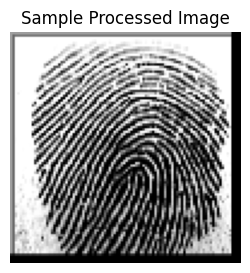

Data saved in C:\Users\Jehan\Desktop\fingerprint_project\fingerprint_recognition-master\fingerprint_recognition-master\archive\SOCOFing\processed_dataset. Processing complete.


In [3]:
def extract_label(img_path):
    """
    Extracts labels from SOCOFing dataset filenames.
    Example filename: "9__M_Right_thumb_finger.BMP"
    
    Returns: [subject_id, gender (M=1, F=0), hand (Right=1, Left=0), finger index (Thumb=0, Index=1, ...)]
    """
    filename = os.path.basename(img_path).replace(".BMP", "")  # Remove file extension
    parts = [p for p in filename.split("_") if p]  # Remove empty strings

    try:
        # Extract relevant parts
        subject_id = int(parts[0])  # Subject ID
        gender = 1 if parts[1] == "M" else 0  # 'M' -> 1, 'F' -> 0
        hand = parts[2]  # 'Left' or 'Right'

        # Hand mapping
        lr = 1 if hand == "Right" else 0  # 'Right' -> 1, 'Left' -> 0

        # Finger name might be split across two parts (e.g., "thumb_finger")
        finger_name = "_".join(parts[3:])  # Join remaining parts for the correct name

        # Finger name mapping
        finger_map = {
            "thumb_finger": 0,
            "index_finger": 1,
            "middle_finger": 2,
            "ring_finger": 3,
            "little_finger": 4
        }

        if finger_name not in finger_map:
            raise ValueError(f"Unknown finger name '{finger_name}' in {filename}")

        finger = finger_map[finger_name]  # Convert finger name to index
        return np.array([subject_id, gender, lr, finger], dtype=np.uint16)
    
    except (IndexError, ValueError, KeyError) as e:
        print(f"Error parsing label from {filename}: {e}")
        return np.array([0, 0, 0, 0], dtype=np.uint16)  # Default label for errors

# **Update this path based on your dataset location**
img_dir = r"C:\Users\Jehan\Desktop\fingerprint_project\fingerprint_recognition-master\fingerprint_recognition-master\archive\SOCOFing\Real"
img_list = sorted(glob.glob(os.path.join(img_dir, "*.BMP")))

# Check if images exist
if not img_list:
    raise FileNotFoundError(f"No images found in {img_dir}. Check the path.")

print(f"Found {len(img_list)} images.")

# Preallocate arrays
imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

# Process images
for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Warning: Could not read {img_path}. Skipping.")
        continue  # Skip this image

    img = cv2.resize(img, (96, 96))  # Resize to 96x96
    imgs[i] = img
    labels[i] = extract_label(img_path)  # Extract labels

# Define save directory (save in dataset folder)
save_dir = os.path.join(os.path.dirname(img_dir), "processed_dataset")  # Saves in "processed_dataset" folder
os.makedirs(save_dir, exist_ok=True)  # Create if it doesn’t exist

# Save processed data
np.save(os.path.join(save_dir, "x_hard.npy"), imgs)
np.save(os.path.join(save_dir, "y_real.npy"), labels)
np.save(os.path.join(save_dir, "x_hard.npz"), imgs)
np.save(os.path.join(save_dir, "y_real.npz"), labels)
# Display a sample image
plt.figure(figsize=(3, 3))  # Bigger figure size
plt.imshow(imgs[0], cmap="gray")
plt.title("Sample Processed Image")
plt.axis("off")
plt.show()

print(f"Data saved in {save_dir}. Processing complete.")


Found 17931 images.


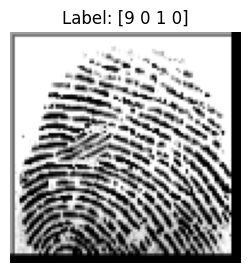

In [4]:
# Corrected path and glob syntax
img_dir = r"C:\Users\Jehan\Desktop\fingerprint_project\fingerprint_recognition-master\fingerprint_recognition-master\archive\SOCOFing\Altered\Altered-Easy"
img_list = sorted(glob.glob(os.path.join(img_dir, "*.BMP")))  # Added "*.BMP" to correctly list image files

print(f"Found {len(img_list)} images.")

# Preallocate arrays
imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

# Process images
for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Warning: Could not read {img_path}. Skipping.")
        continue  # Skip this image

    img = cv2.resize(img, (96, 96))  # Resize to 96x96
    imgs[i] = img
    labels[i] = extract_label2(img_path)  # Extract labels

# Ensure dataset directory exists before saving
dataset_dir = "dataset"
os.makedirs(dataset_dir, exist_ok=True)

# Save processed data
np.save(os.path.join(dataset_dir, "x_easy.npy"), imgs)
np.save(os.path.join(dataset_dir, "y_easy.npy"), labels)
np.save(os.path.join(dataset_dir, "x_easy.npz"), imgs)
np.save(os.path.join(dataset_dir, "y_easy.npz"), labels)

# Display a sample image with properly formatted title
plt.figure(figsize=(3, 3))  # Increased figure size
plt.title(f"Label: {labels[-1]}")
plt.imshow(imgs[-1], cmap="gray")
plt.axis("off")
plt.show()


Found 17067 images.


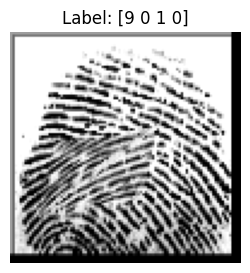

In [5]:


# Corrected path and glob syntax
img_dir = r"C:\Users\Jehan\Desktop\fingerprint_project\fingerprint_recognition-master\fingerprint_recognition-master\archive\SOCOFing\Altered\Altered-Medium" # Ensure this is the correct directory
img_list = sorted(glob.glob(os.path.join(img_dir, "*.BMP")))  # Fetches all BMP images

# Check if images exist
if not img_list:
    raise FileNotFoundError(f"No images found in {img_dir}. Check the path.")

print(f"Found {len(img_list)} images.")

# Preallocate arrays
imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

# Process images
for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Warning: Could not read {img_path}. Skipping.")
        continue  # Skip this image

    img = cv2.resize(img, (96, 96))  # Resize to 96x96
    imgs[i] = img
    labels[i] = extract_label2(img_path)  # Extract labels

# Ensure dataset directory exists before saving
dataset_dir = "dataset"
os.makedirs(dataset_dir, exist_ok=True)

# Save processed data
np.save(os.path.join(dataset_dir, "x_medium.npy"), imgs)
np.save(os.path.join(dataset_dir, "y_medium.npy"), labels)
np.save(os.path.join(dataset_dir, "x_medium.npz"), imgs)
np.save(os.path.join(dataset_dir, "y_medium.npz"), labels)
# Display a sample image with properly formatted title
plt.figure(figsize=(3, 3))  # Increased figure size
plt.title(f"Label: {labels[-1]}")
plt.imshow(imgs[-1], cmap="gray")
plt.axis("off")
plt.show()


Found 14272 images.


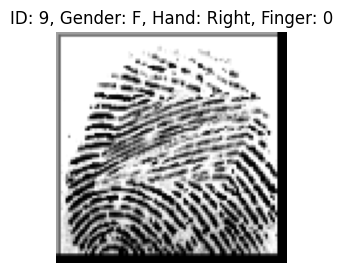

In [15]:
# Define path for the dataset
img_dir = r"C:\Users\Jehan\Desktop\fingerprint_project\fingerprint_recognition-master\fingerprint_recognition-master\archive\SOCOFing\Altered\Altered-Hard"
img_list = sorted(glob.glob(os.path.join(img_dir, "*.BMP")))  # Fetch all BMP images

# Check if images exist
if not img_list:
    raise FileNotFoundError(f"No images found in {img_dir}. Check the path.")

print(f"Found {len(img_list)} images.")

# Preallocate arrays
imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

# Process images
for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Warning: Could not read {img_path}. Skipping.")
        continue  # Skip this image

    img = cv2.resize(img, (96, 96))  # Resize to 96x96
    imgs[i] = img
    labels[i] = extract_label2(img_path)  # Extract labels

# Ensure dataset directory exists before saving
dataset_dir = "dataset"
os.makedirs(dataset_dir, exist_ok=True)

# Save processed data
np.save(os.path.join(dataset_dir, "x_hard.npy"), imgs)
np.save(os.path.join(dataset_dir, "y_hard.npy"), labels)

# Display a sample image with properly formatted title
plt.figure(figsize=(3, 3))  # Increased figure size
plt.title(f"ID: {labels[-1][0]}, Gender: {'M' if labels[-1][1] else 'F'}, Hand: {'Right' if labels[-1][2] else 'Left'}, Finger: {labels[-1][3]}")
plt.imshow(imgs[-1], cmap="gray")
plt.axis("off")
plt.show()

Processing Altered-Easy: Found 17931 images.


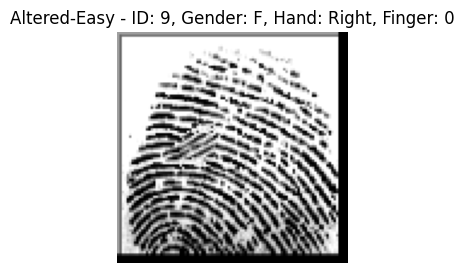

Altered-Easy processed and saved in C:\Users\Jehan\Desktop\fingerprint_project\fingerprint_recognition-master\fingerprint_recognition-master\archive\SOCOFing\processed_dataset.

Processing Altered-Medium: Found 17067 images.


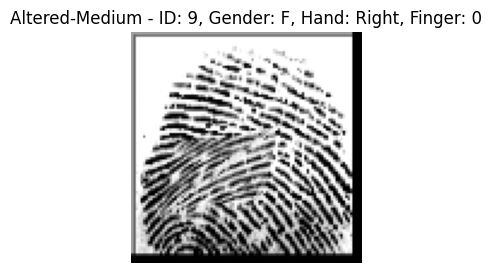

Altered-Medium processed and saved in C:\Users\Jehan\Desktop\fingerprint_project\fingerprint_recognition-master\fingerprint_recognition-master\archive\SOCOFing\processed_dataset.

Processing Altered-Hard: Found 14272 images.


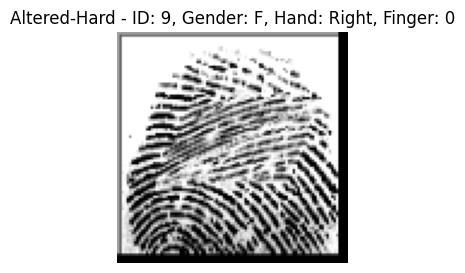

Altered-Hard processed and saved in C:\Users\Jehan\Desktop\fingerprint_project\fingerprint_recognition-master\fingerprint_recognition-master\archive\SOCOFing\processed_dataset.

All datasets processed successfully!


In [7]:
import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the base directory for altered fingerprint datasets
base_dir = r"C:\Users\Jehan\Desktop\fingerprint_project\fingerprint_recognition-master\fingerprint_recognition-master\archive\SOCOFing\Altered"
datasets = ["Altered-Easy", "Altered-Medium", "Altered-Hard"]

# Define output save directory
save_dir = r"C:\Users\Jehan\Desktop\fingerprint_project\fingerprint_recognition-master\fingerprint_recognition-master\archive\SOCOFing\processed_dataset"
os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

# Process each altered dataset
for dataset in datasets:
    img_dir = os.path.join(base_dir, dataset)  # Full path to dataset
    img_list = sorted(glob.glob(os.path.join(img_dir, "*.BMP")))  # Fetch all BMP images

    # Check if images exist
    if not img_list:
        print(f"Warning: No images found in {img_dir}. Skipping...")
        continue

    print(f"Processing {dataset}: Found {len(img_list)} images.")

    # Preallocate arrays
    imgs = np.empty((len(img_list), 96, 96), dtype=np.uint8)
    labels = np.empty((len(img_list), 4), dtype=np.uint16)

    # Process images
    for i, img_path in enumerate(img_list):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"Warning: Could not read {img_path}. Skipping.")
            continue  # Skip this image

        img = cv2.resize(img, (96, 96))  # Resize to 96x96
        imgs[i] = img
        labels[i] = extract_label2(img_path)  # Extract labels

    # Define filenames based on dataset type
    dataset_name = dataset.split("-")[-1].lower()  # "easy", "medium", "hard"

    # Save .npy files
    np.save(os.path.join(save_dir, f"x_{dataset_name}.npy"), imgs)
    np.save(os.path.join(save_dir, f"y_{dataset_name}.npy"), labels)

    # Save compressed .npz file
    np.savez_compressed(os.path.join(save_dir, f"dataset_{dataset_name}.npz"), x=imgs, y=labels)

    # Display a sample image from the dataset
    plt.figure(figsize=(3, 3))  # Increased figure size
    plt.title(f"{dataset} - ID: {labels[-1][0]}, Gender: {'M' if labels[-1][1] else 'F'}, Hand: {'Right' if labels[-1][2] else 'Left'}, Finger: {labels[-1][3]}")
    plt.imshow(imgs[-1], cmap="gray")
    plt.axis("off")
    plt.show()

    print(f"{dataset} processed and saved in {save_dir}.\n")

print("All datasets processed successfully!")


In [ ]:
import os
import glob
import numpy as np
import cv2

# Define the original dataset path
real_dataset_path = r"C:\Users\Jehan\Desktop\fingerprint_project\fingerprint_recognition-master\fingerprint_recognition-master\archive\SOCOFing\Real"
processed_path = r"C:\Users\Jehan\Desktop\fingerprint_project\fingerprint_recognition-master\fingerprint_recognition-master\archive\SOCOFing\processed_dataset"

# Get the list of image files
img_list = sorted(glob.glob(os.path.join(real_dataset_path, "*.BMP")))

# Check if images exist
if not img_list:
    raise FileNotFoundError(f"No images found in {real_dataset_path}. Check the path.")

print(f"Found {len(img_list)} images in 'Real' dataset.")

# Preallocate labels array
labels_real = np.empty((len(img_list), 4), dtype=np.uint16)

# Define the function to extract labels from filenames
def extract_label2(img_path):
    """
    Extracts labels from the filename.
    Assumes filename format: "1234_M_Right_thumb_finger.BMP"
    """
    filename = os.path.basename(img_path).replace(".BMP", "")  # Remove file extension
    parts = [p for p in filename.split("_") if p]  # Remove empty strings

    try:
        subject_id = int(parts[0])  # Subject ID
        gender = 1 if parts[1] == "M" else 0  # 'M' -> 1, 'F' -> 0
        hand = 1 if parts[2] == "Right" else 0  # 'Right' -> 1, 'Left' -> 0
        finger_map = {"thumb_finger": 0, "index_finger": 1, "middle_finger": 2, "ring_finger": 3, "little_finger": 4}
        finger = finger_map["_".join(parts[3:])]  # Extract full finger name

        return np.array([subject_id, gender, hand, finger], dtype=np.uint16)

    except (IndexError, ValueError, KeyError) as e:
        print(f"Error parsing label from {filename}: {e}")
        return np.array([0, 0, 0, 0], dtype=np.uint16)  # Default label for errors

# Process images and extract labels
for i, img_path in enumerate(img_list):
    labels_real[i] = extract_label2(img_path)

# Save the corrected y_real.npy file
np.save(os.path.join(processed_path, "y_real.npy"), labels_real)

print(f"✅ y_real.npy successfully regenerated and saved in {processed_path}")
